<a href="https://colab.research.google.com/github/rajayourfriend/EIP_Assignments/blob/master/EIP4_Assignment2_06_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


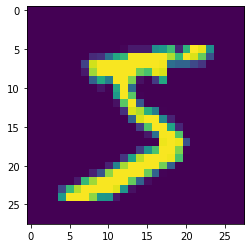

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

#Use GAP, BN, LRscheduler, dropout, callbacks
model.add(Convolution2D(10, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), name="FirstConv"))#26
model.add(Dropout(0.1))
model.add(Convolution2D(20, kernel_size=(3, 3), activation='relu'))#24
model.add(Dropout(0.1))
model.add(Convolution2D(30, kernel_size=(3, 3), activation='relu'))#22
model.add(Dropout(0.01))

model.add(MaxPooling2D(2, 2))#11
model.add(Convolution2D(20, 1, activation='relu'))#11

model.add(Convolution2D(40, kernel_size=(3, 3), activation='relu'))#9
model.add(Dropout(0.1))
model.add(Convolution2D(50, kernel_size=(3, 3), activation='relu'))#7
model.add(Dropout(0.1))
model.add(Convolution2D(60, kernel_size=(3, 3), activation='relu'))#5
model.add(Dropout(0.1))

model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FirstConv (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 20)        1820      
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 30)        5430      
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 30)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 30)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:

snapshot_filepath = "/opt/saved_weight_file.hdf5"
cp_callback = keras.callbacks.ModelCheckpoint(snapshot_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
CALLBACKS = [cp_callback]

model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test), callbacks = CALLBACKS)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  





Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 21s 352us/step - loss: 0.1685 - acc: 0.9474 - val_loss: 0.0461 - val_acc: 0.9845

Epoch 00001: val_acc improved from -inf to 0.98450, saving model to /opt/saved_weight_file.hdf5
Epoch 2/20
60000/60000 [==============================] - 13s 213us/step - loss: 0.0558 - acc: 0.9827 - val_loss: 0.0429 - val_acc: 0.9850

Epoch 00002: val_acc improved from 0.98450 to 0.98500, saving model to /opt/saved_weight_file.hdf5
Epoch 3/20
60000/60000 [==============================] - 13s 213us/step - loss: 0.0424 - acc: 0.9870 - val_loss: 0.0356 - val_acc: 0.9889

Epoch 00003: val_acc improved from 0.98500 to 0.98890, saving model to /opt/saved_weight_file.hdf5
Epoch 4/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.0342 - acc: 0.9892 - val_loss: 0.0321 - val_acc: 0.9893

Epoch 00004: val_acc improved from 0.98890 to 0.98930, saving model to /opt/saved_weight

In [0]:
model.load_weights(snapshot_filepath)
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.023214175921116794, 0.9942]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.59118508e-12 1.15946911e-12 2.52230570e-10 2.17938965e-08
  7.96587798e-14 5.48083410e-12 1.77478507e-18 1.00000000e+00
  4.45210139e-14 1.44781950e-10]
 [1.07982396e-08 9.15734475e-08 9.99998927e-01 1.61861627e-12
  2.62382347e-08 5.68364474e-13 7.92358946e-07 1.70422433e-12
  6.32692831e-08 2.41174051e-12]
 [3.96154054e-10 9.99997735e-01 9.84013866e-08 1.91663248e-11
  4.52636151e-10 6.40789892e-07 4.02835854e-09 1.20311154e-06
  5.45894459e-08 2.03346161e-07]
 [1.00000000e+00 2.52111350e-17 1.31968232e-12 2.36580963e-11
  1.01406619e-10 3.48793106e-09 6.47746479e-09 3.05252850e-12
  9.01671515e-10 4.27748432e-08]
 [3.78604953e-10 1.66561548e-13 2.24454520e-15 5.85708443e-14
  9.99997020e-01 9.36363508e-13 3.24254998e-11 3.54918257e-14
  7.01219989e-08 2.92966456e-06]
 [4.46038345e-10 9.99998689e-01 1.71467729e-08 6.53497100e-14
  1.38156736e-10 1.40176839e-08 4.75107065e-10 1.24017606e-06
  9.16422227e-09 1.42431560e-08]
 [3.29025978e-16 4.36098890e-09 7.86374264e-12 8.80476010e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored